In [6]:
%pip install plotly-geo
%pip install geopandas
%pip install pyshp
%pip install shapely
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/76/d8/02fa68de37f657e6bb241e6f9ec6240bafa43222d3ef836a248145d9548f/scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/f3/31/91a2a3c5eb85d2bfa86d7c98f2df5d77dcdefb3d80ca9f9037ad04393acf/scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 890.4 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 890.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.6 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

Creating the DataFrame

In [2]:
df = pd.read_csv('polymer_reactor.txt')
df = df.rename(columns= {'Unnamed: 0' : 'Time Uploaded','513FC31103.pv': 'C3', '513HC31114-5.mv' : 'H2R', '513PC31201.pv' : 'Pressure', '513LC31202.pv' : 'Level', '513FC31409.pv' : 'C2', '513FC31114-5.pv' : 'Cat', '513TC31220.pv' : 'Temp'})
print(df.shape)
df.head()

(2564, 9)


,Time Uploaded,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


Checking if DataFrame Has any Empty

In [3]:
nan_df = df[df.isna().any(axis = 1)]
print(nan_df.shape)
nan_df.head()

(80, 9)


,Time Uploaded,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
8,04-06-18 11:45,27971.072,0.15,NaN,NaN,NaN,0.150164,NaN,3.7
718,6/30/2018 13:45,NaN,0.00,NaN,NaN,NaN,NaN,NaN,15.4
719,6/30/2018 15:45,NaN,0.00,NaN,NaN,NaN,NaN,NaN,16.4
720,6/30/2018 17:45,NaN,0.00,NaN,NaN,NaN,NaN,NaN,16.4
721,6/30/2018 19:45,NaN,0.00,NaN,NaN,NaN,NaN,NaN,18.4


In [4]:
nan_df[df.isna()]

,Time Uploaded,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Turn Time from str to timestamp

In [5]:
x = pd.to_datetime(df['Time Uploaded'][0])
print(x)

2018-04-05 19:45:00


In [6]:
df['Time Stamp'] = pd.to_datetime(df['Time Uploaded'])
df = df.drop(columns = ['Time Uploaded'])

In [7]:
df.head()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,Time Stamp
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,2018-04-05 19:45:00
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,2018-04-05 21:45:00
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,2018-04-05 23:45:00
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,2018-04-06 01:45:00
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,2018-04-06 03:45:00


Correlation Matrix

In [8]:
df.corr()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,Time Stamp
C3,1.000000,-0.035846,-0.246382,0.207590,0.387429,0.280031,-0.157591,-0.247960,-0.302015
H2R,-0.035846,1.000000,0.221576,0.104436,0.375745,0.226894,0.052967,0.316216,-0.304959
Pressure,-0.246382,0.221576,1.000000,0.044294,0.064547,-0.152372,-0.036286,0.438837,-0.025657
Level,0.207590,0.104436,0.044294,1.000000,0.289986,0.000157,-0.084688,-0.006452,-0.680515
C2,0.387429,0.375745,0.064547,0.289986,1.000000,0.246106,0.116090,0.233219,-0.360933
Cat,0.280031,0.226894,-0.152372,0.000157,0.246106,1.000000,0.103214,-0.208911,-0.190717
Temp,-0.157591,0.052967,-0.036286,-0.084688,0.116090,0.103214,1.000000,0.125628,0.321823
MFR,-0.247960,0.316216,0.438837,-0.006452,0.233219,-0.208911,0.125628,1.000000,0.024231
Time Stamp,-0.302015,-0.304959,-0.025657,-0.680515,-0.360933,-0.190717,0.321823,0.024231,1.000000


Correlation Matrix

<Axes: >

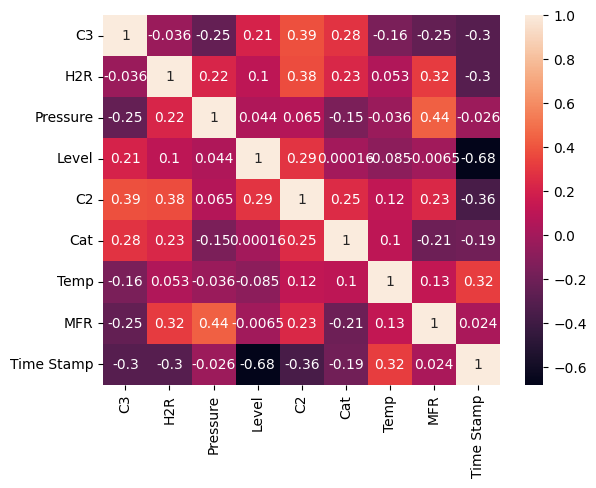

In [9]:
sns.heatmap(df.corr(), annot=True)

Scatter Plots

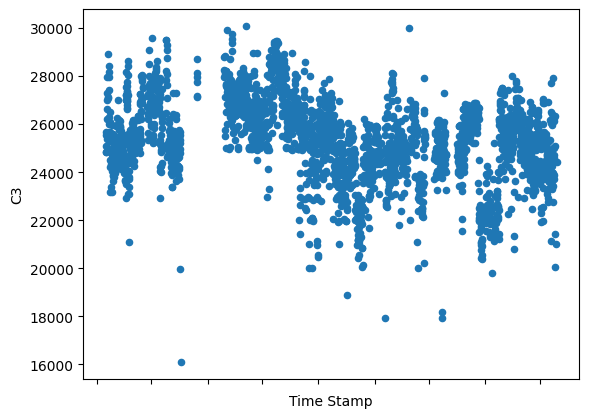

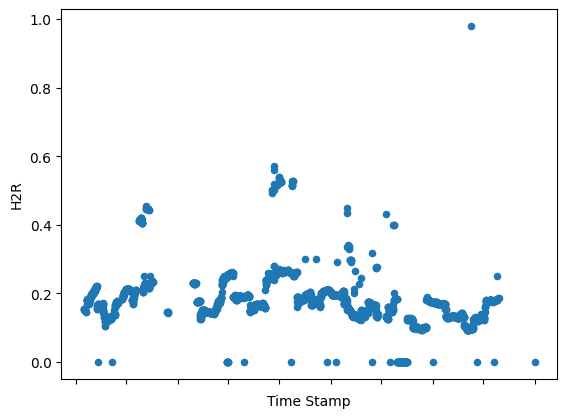

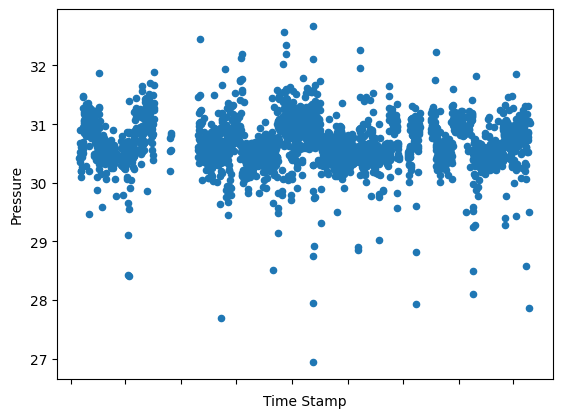

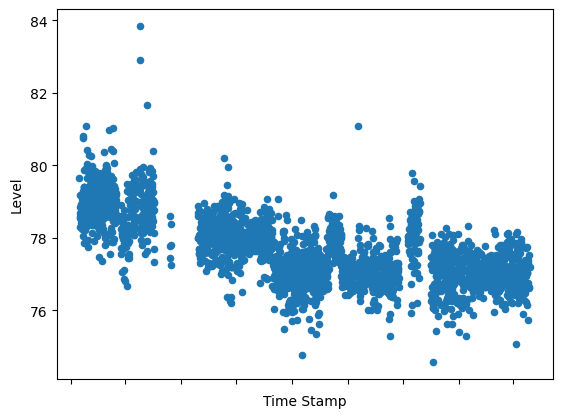

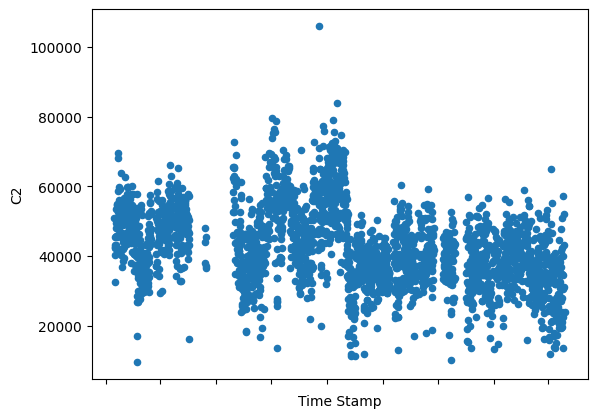

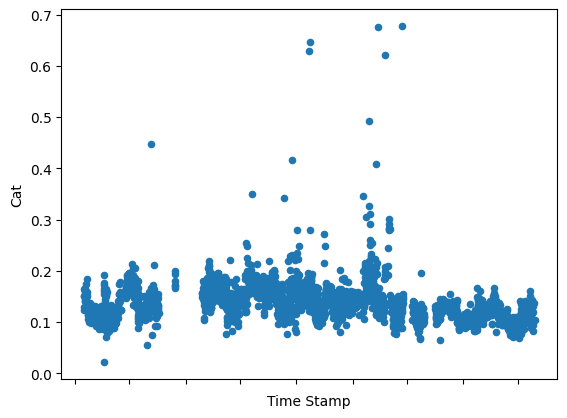

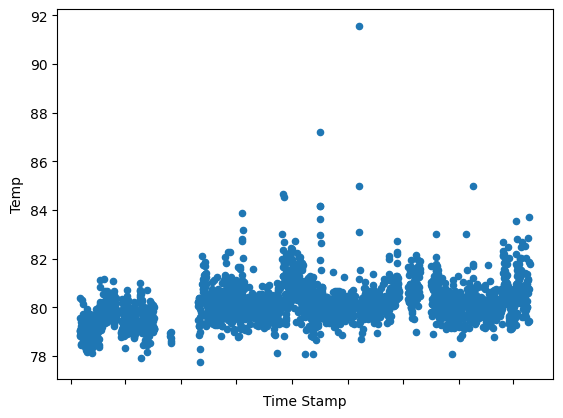

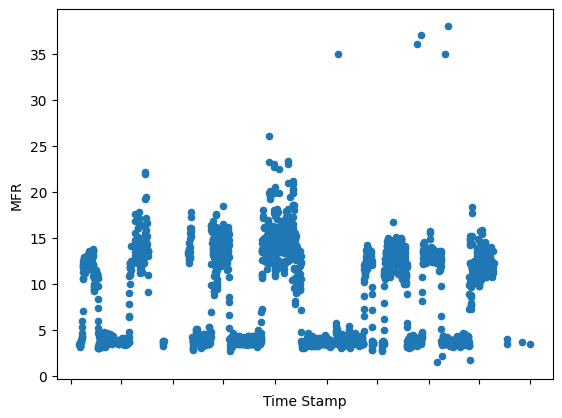

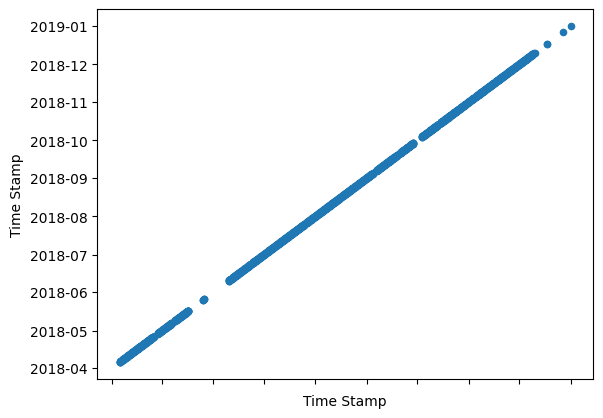

In [10]:
for column in df:
    ax = df.plot.scatter(x = 'Time Stamp', y = column)
    ax.xaxis.set_ticklabels([])

Create table where no nan

In [11]:
df_no_nan = df.dropna()

Run Previous Graphs Again

Correlation Matrix

<Axes: >

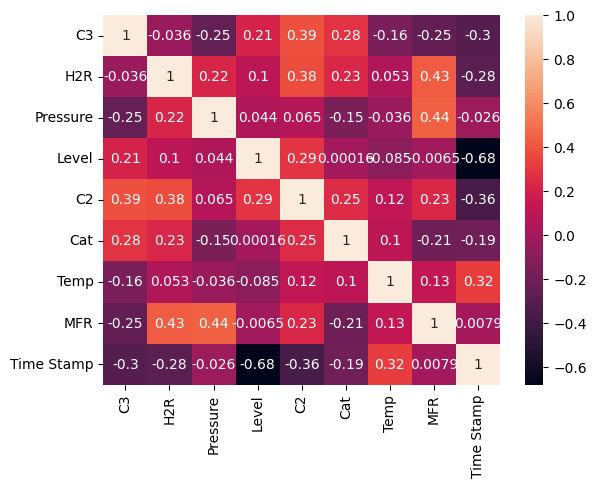

In [12]:
sns.heatmap(df_no_nan.corr(), annot=True)

Scatter Plots

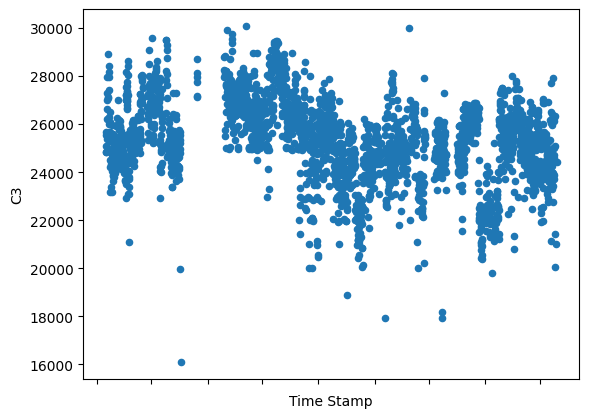

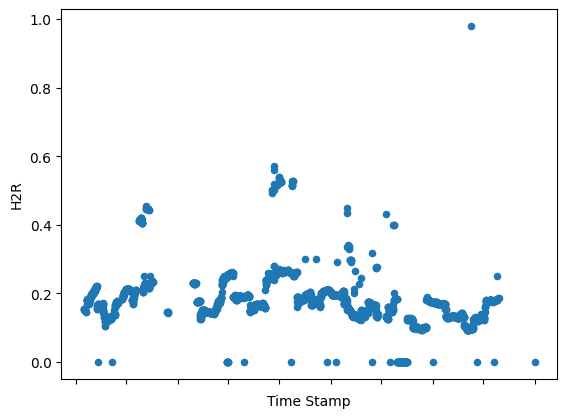

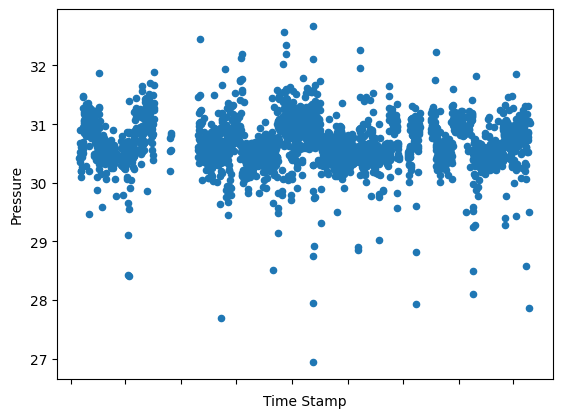

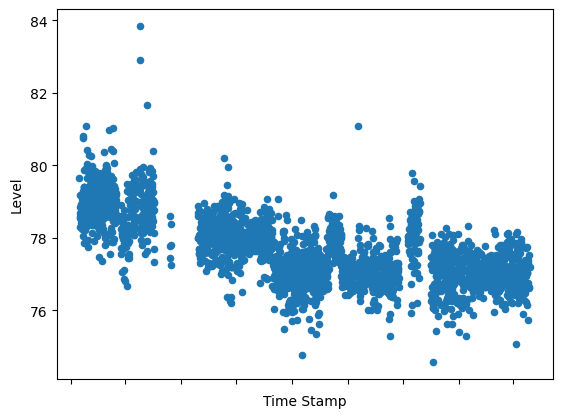

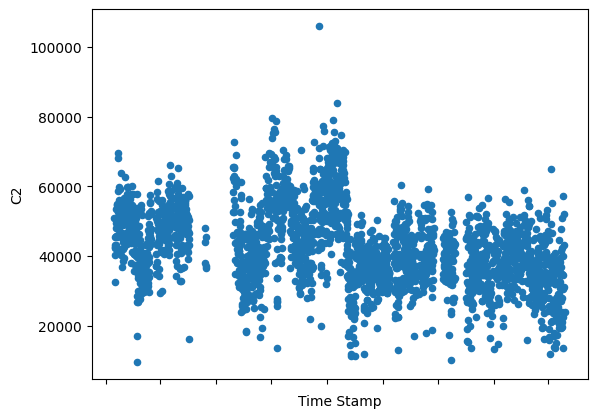

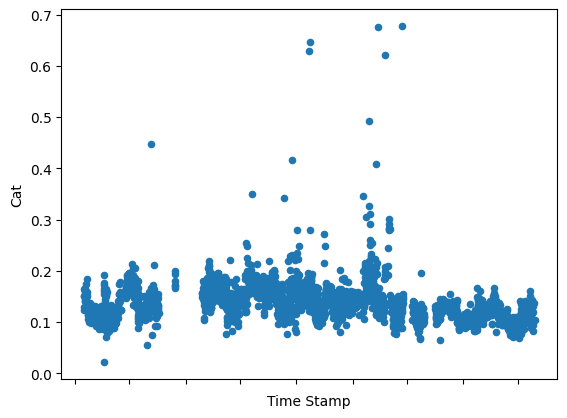

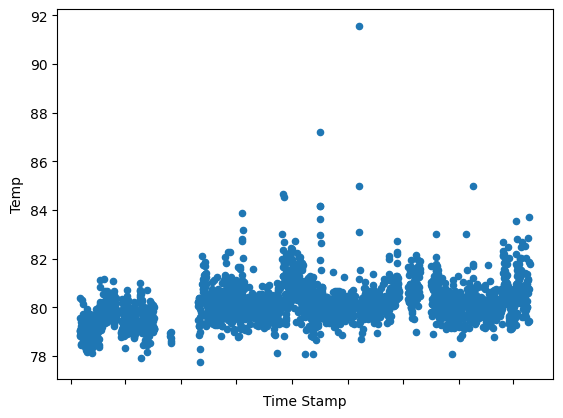

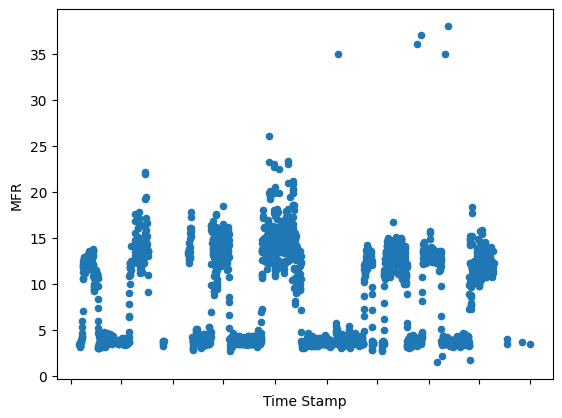

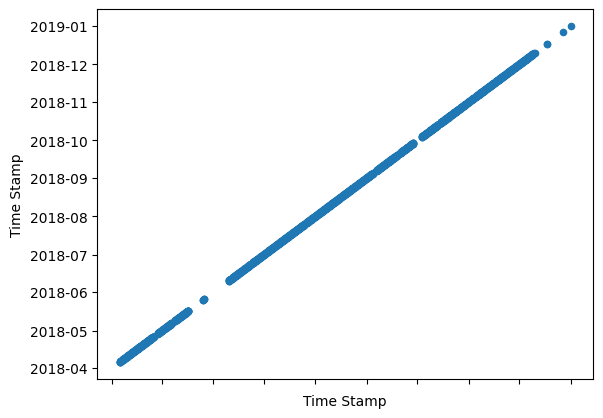

In [13]:
for column in df:
    ax = df.plot.scatter(x = 'Time Stamp', y = column)
    ax.xaxis.set_ticklabels([])

Get Maxes and Mins

In [ ]:
print('MAXES: ')
for column_name, column in df.items():
    max_row = df.loc[column.idxmax()]
    print(column_name, ': \n', max_row, '\n--------------------')

print('\nMINS: ')
for column_name, column in df.items():
    min_row = df.loc[column.idxmin()]
    print(column_name, ': \n', max_row, '\n--------------------')

Create Multiple Linear Regression Models

MFR vs Everything Else

In [114]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = df.loc[:, df.columns!= 'MFR']
y = df[['MFR']]

# turn type Time Stamp to int
x['Time Stamp'] = pd.to_datetime(x['Time Stamp']).astype('int64')

# replace NAN with mean with Imputer
x = imp.fit_transform(x)
y = imp.fit_transform(y)

In [127]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,test_size=0.5)

In [116]:
print("X_train:",Xtrain.shape)
print("X_test:",Xtest.shape)
print("Y_train:",ytrain.shape)
print("Y_test:",ytest.shape)

X_train: (1282, 8)
X_test: (1282, 8)
Y_train: (1282, 1)
Y_test: (1282, 1)


In [128]:
reg = LinearRegression()
reg.fit(Xtrain,ytrain)

ypred = reg.predict(Xtest)
r2 = r2_score(ytest,ypred) * 100
print("Accuracty: ", r2, "%")

Accuracty:  19.93332841755826 %


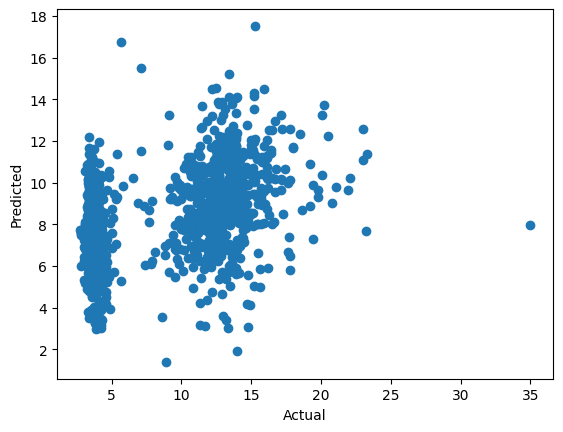

In [129]:
plt.pyplot.scatter(ytest,ypred);
plt.pyplot.xlabel('Actual');
plt.pyplot.ylabel('Predicted');

Text(0, 0.5, 'Predicted')

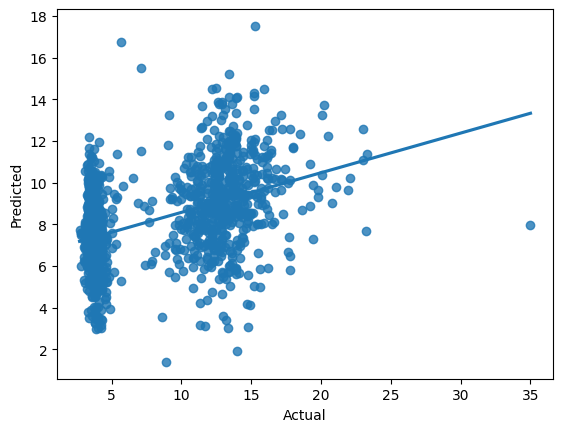

In [135]:
sns.regplot(x=ytest,y=ypred,ci=None);
plt.pyplot.xlabel('Actual')
plt.pyplot.ylabel('Predicted')

Doing this for all parts of df

C3 Accuracy:  27.793456678006244 % 
Coef:              0             0
0         H2R -4.859867e-01
1    Pressure -7.651699e+00
2       Level  3.797533e-01
3          C2  6.554935e-02
4         Cat  2.800408e-01
5        Temp -1.354984e+00
6         MFR -1.186779e+02
7  Time Stamp -3.019807e-14


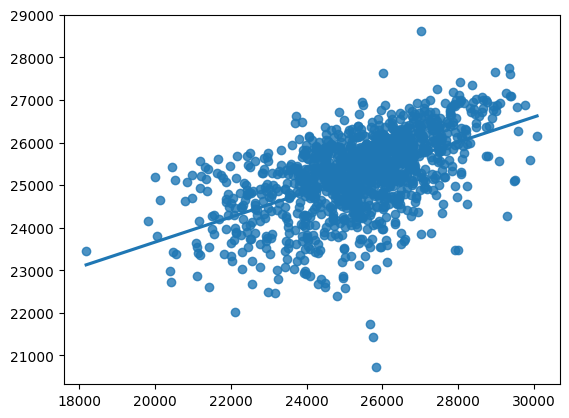

H2R Accuracy:  22.48547220430893 % 
Coef:              0             0
0          C3 -6.885220e-06
1    Pressure  1.251184e-04
2       Level -1.516519e-05
3          C2  1.520711e-06
4         Cat -6.844261e-06
5        Temp  1.098321e-05
6         MFR  3.983409e-03
7  Time Stamp -3.659182e-18


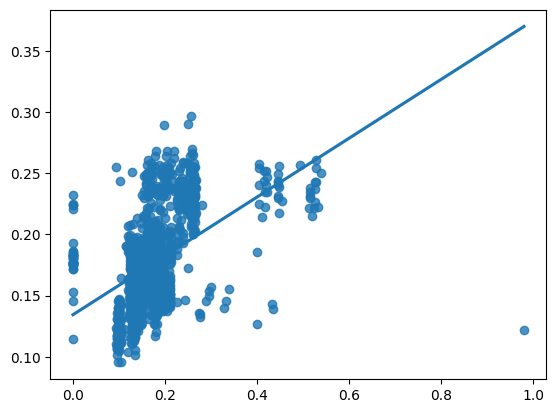

Pressure Accuracy:  23.79966357940195 % 
Coef:              0             0
0          C3 -4.319695e-05
1         H2R -1.042490e-04
2       Level -2.862755e-04
3          C2  1.450996e-06
4         Cat -4.260827e-05
5        Temp  1.426914e-04
6         MFR  3.047508e-02
7  Time Stamp -6.708501e-18


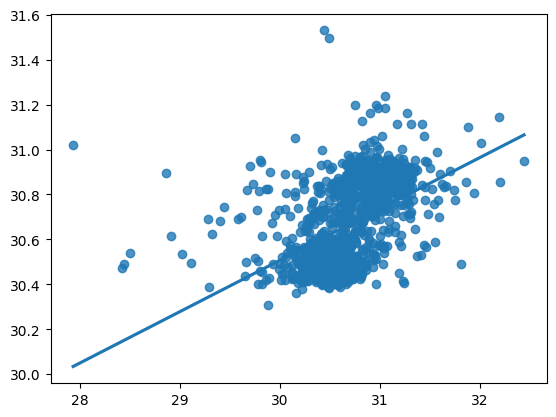

Level Accuracy:  43.640724893542284 % 
Coef:              0             0
0          C3 -1.394850e-05
1         H2R  1.802607e-06
2    Pressure -7.408685e-05
3          C2  4.694568e-06
4         Cat  4.715504e-06
5        Temp -8.577776e-07
6         MFR -2.333612e-03
7  Time Stamp -9.717268e-17


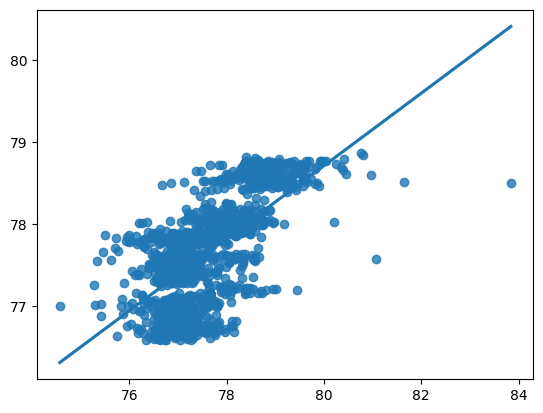

C2 Accuracy:  31.574820831754693 % 
Coef:              0             0
0          C3  2.587597e+00
1         H2R -4.937269e-13
2    Pressure  2.246141e+01
3       Level -8.528320e-01
4         Cat -6.978699e-01
5        Temp  9.052993e+00
6         MFR  7.148596e+02
7  Time Stamp -4.534390e-13


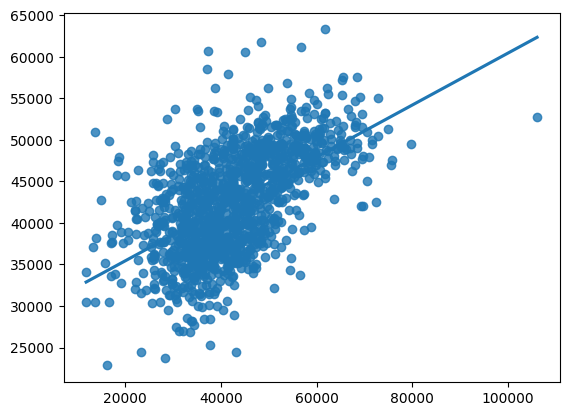

Cat Accuracy:  12.794564639183005 % 
Coef:              0             0
0          C3  3.617403e-06
1         H2R  1.353638e-05
2    Pressure -5.540186e-05
3       Level  2.536226e-06
4          C2  8.890499e-07
5        Temp -5.987415e-06
6         MFR -1.672542e-03
7  Time Stamp -5.488773e-19


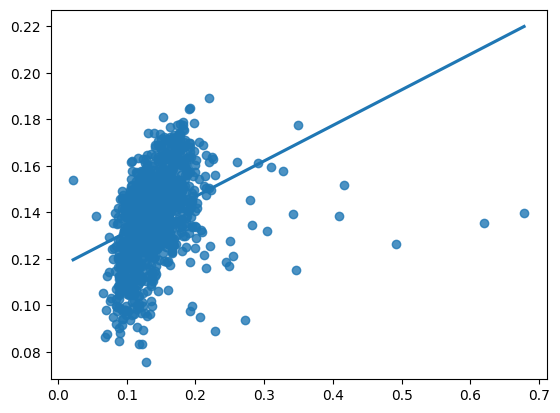

Temp Accuracy:  15.200734991852528 % 
Coef:              0             0
0          C3 -6.484134e-05
1         H2R  5.774026e-17
2    Pressure -1.498583e-04
3       Level -4.973842e-06
4          C2  2.444138e-05
5         Cat  8.920853e-06
6         MFR -4.843482e-03
7  Time Stamp  5.475661e-17


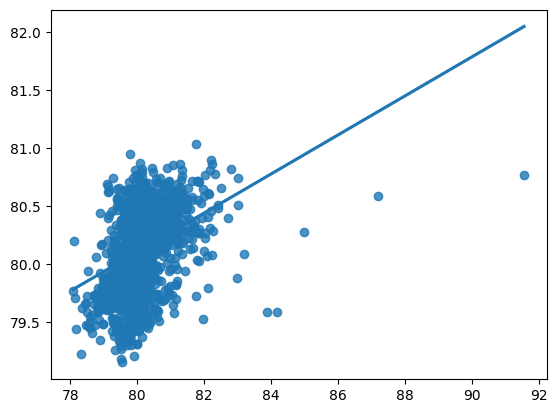

MFR Accuracy:  14.231230451012266 % 
Coef:              0             0
0          C3 -1.320186e-03
1         H2R  4.155699e-16
2    Pressure  1.285847e-07
3       Level -7.160979e-09
4          C2  1.813076e-04
5         Cat -6.794080e-09
6        Temp  1.025159e-07
7  Time Stamp -1.037234e-17


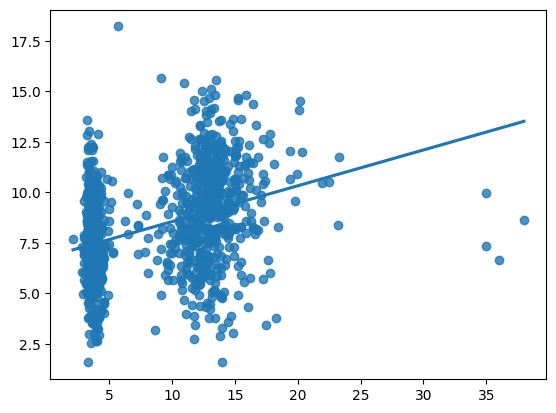

In [149]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for column in df:
    if column == 'Time Stamp': continue
    x = df.loc[:, df.columns!= column]
    y = df[[column]]

    # turn type Time Stamp to int
    x['Time Stamp'] = pd.to_datetime(x['Time Stamp']).astype('int64')

    # replace NAN with mean with Imputer
    x = imp.fit_transform(x)
    y = imp.fit_transform(y)

    Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,test_size=0.5)

    reg = LinearRegression()
    reg.fit(Xtrain,ytrain)

    ypred = reg.predict(Xtest)
    r2 = r2_score(ytest,ypred) * 100
    coefficients = pd.concat(
        [pd.DataFrame(df.loc[:, df.columns!= column].columns),
         pd.DataFrame(np.transpose(reg.coef_))], axis = 1)
    print(column, "Accuracy: ", r2, "%","\nCoef: ", coefficients)
    sns.regplot(x=ytest,y=ypred,ci=None)
    plt.pyplot.show()

Single Linear(without Time)

C3  vs  H2R  Accuracy:  0.11283362355983817 %


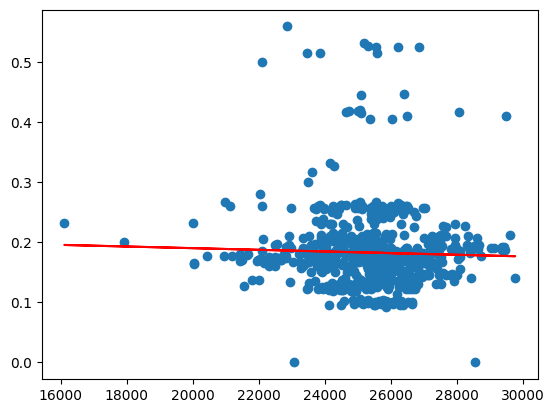

C3  vs  Pressure  Accuracy:  6.495688592205107 %


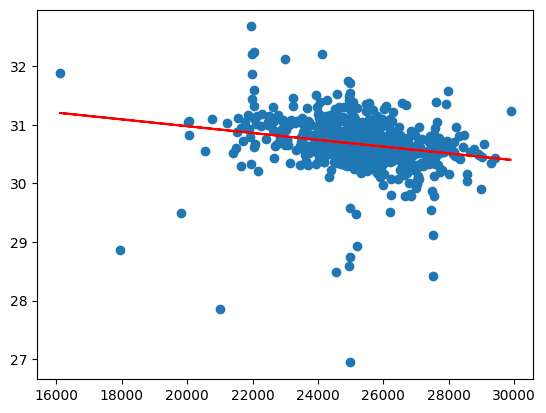

C3  vs  Level  Accuracy:  4.1041457242325 %


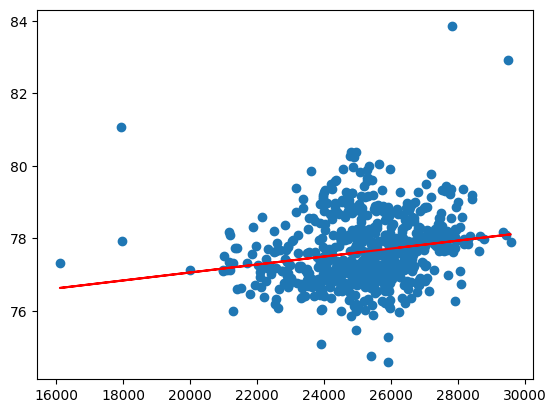

C3  vs  C2  Accuracy:  15.377492679056125 %


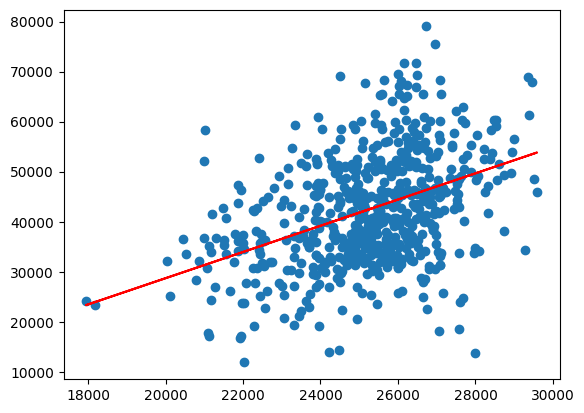

C3  vs  Cat  Accuracy:  9.250851272790662 %


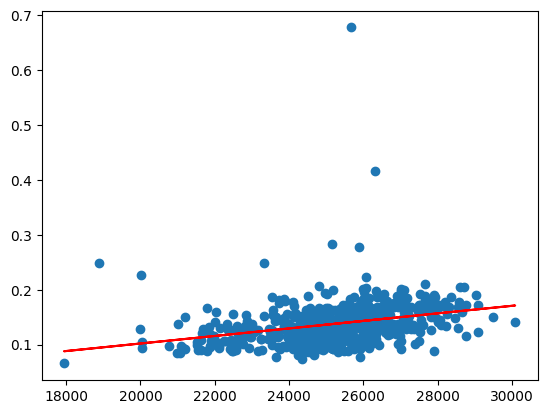

C3  vs  Temp  Accuracy:  3.016920176052873 %


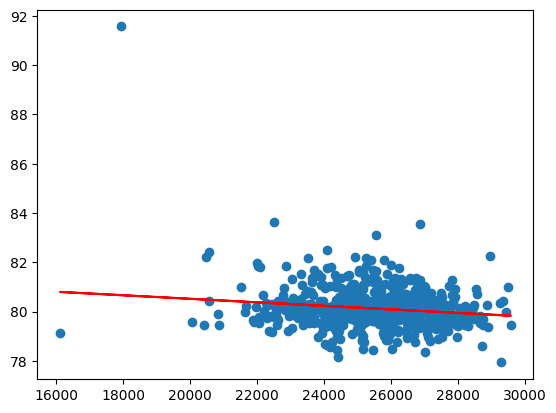

C3  vs  MFR  Accuracy:  9.166562622350227 %


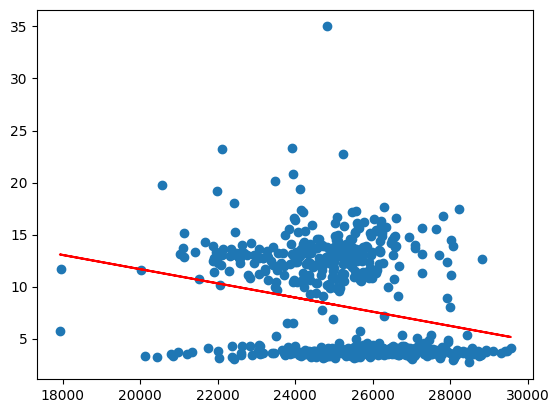

H2R  vs  C3  Accuracy:  0.3067302998235433 %


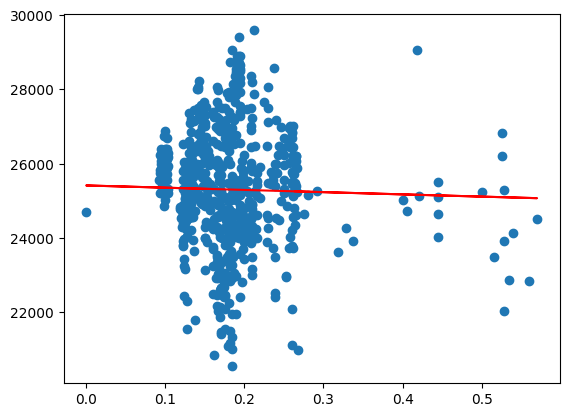

H2R  vs  Pressure  Accuracy:  6.194370892962587 %


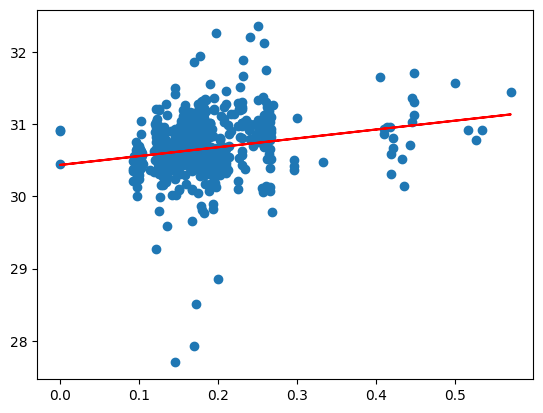

H2R  vs  Level  Accuracy:  1.974943370291582 %


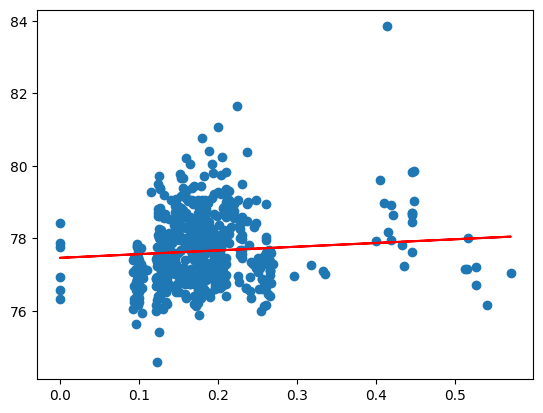

H2R  vs  C2  Accuracy:  15.096342631557524 %


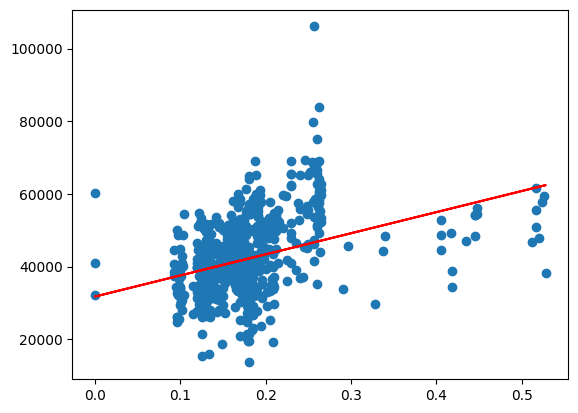

H2R  vs  Cat  Accuracy:  6.835015615965423 %


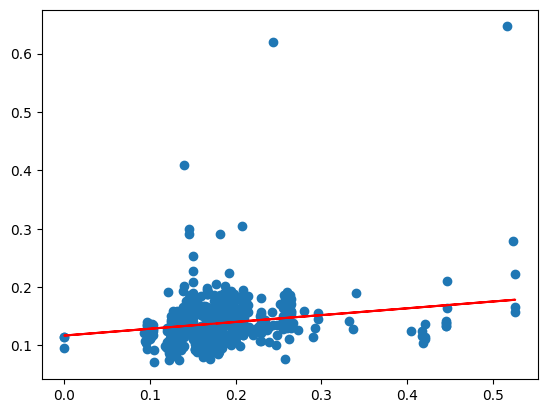

H2R  vs  Temp  Accuracy:  -0.4133850815891682 %


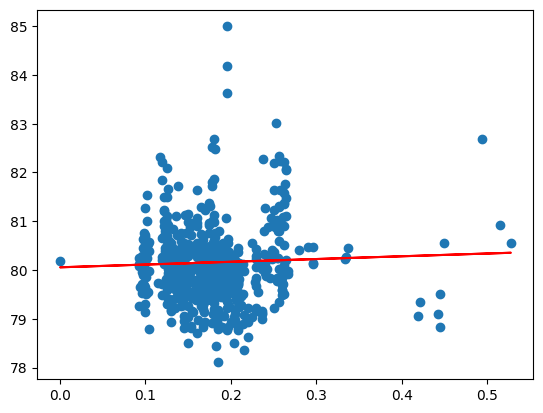

H2R  vs  MFR  Accuracy:  12.635252415949171 %


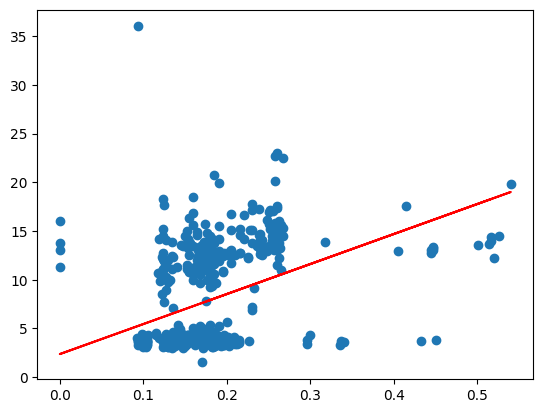

Pressure  vs  C3  Accuracy:  7.97266133403387 %


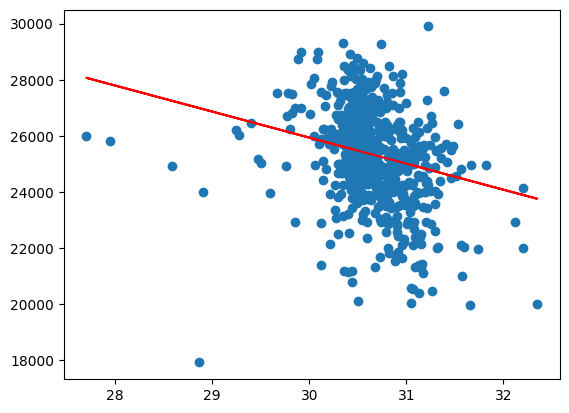

Pressure  vs  H2R  Accuracy:  6.999038831610949 %


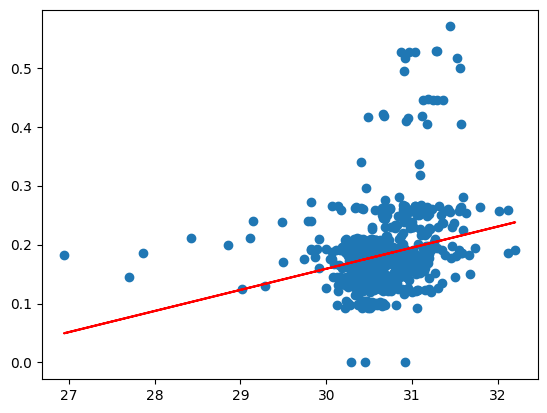

Pressure  vs  Level  Accuracy:  0.060535101370085 %


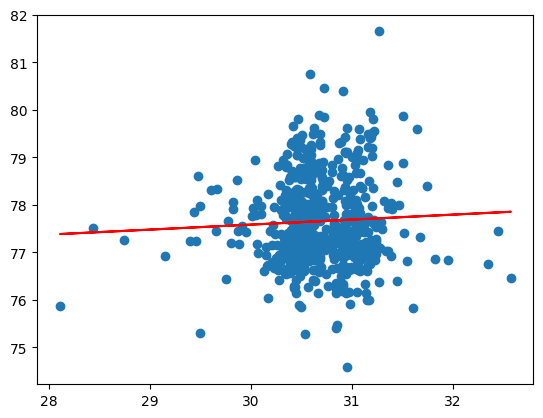

Pressure  vs  C2  Accuracy:  0.13784612840223032 %


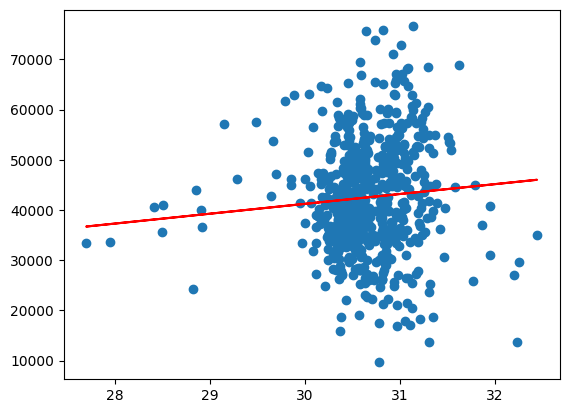

Pressure  vs  Cat  Accuracy:  0.6214216492362978 %


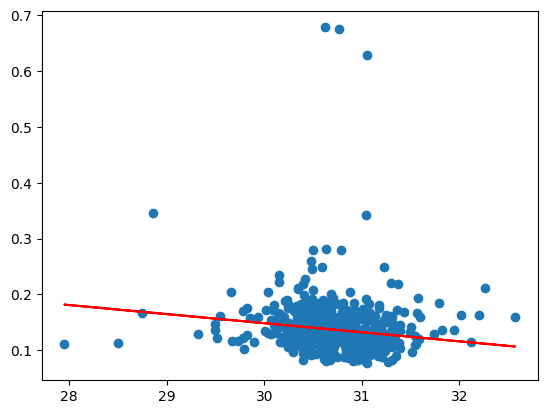

Pressure  vs  Temp  Accuracy:  0.05673678065916121 %


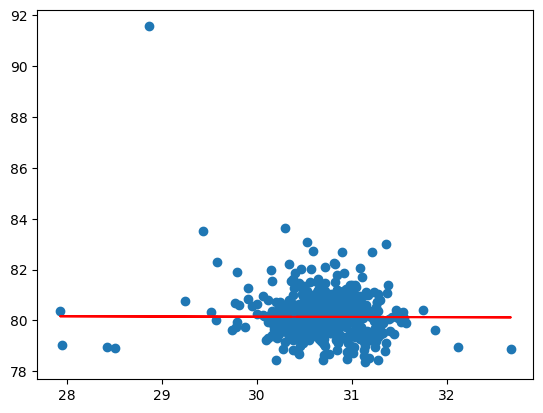

Pressure  vs  MFR  Accuracy:  18.27788896347855 %


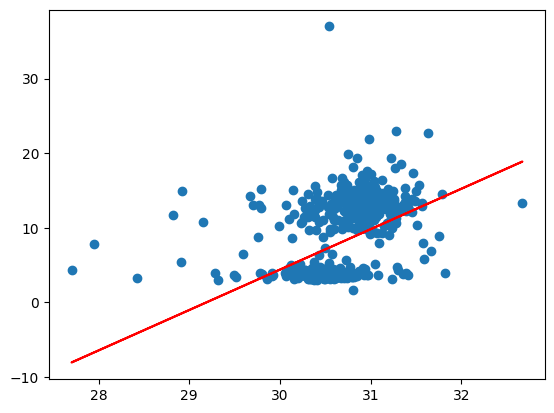

Level  vs  C3  Accuracy:  4.464802845919835 %


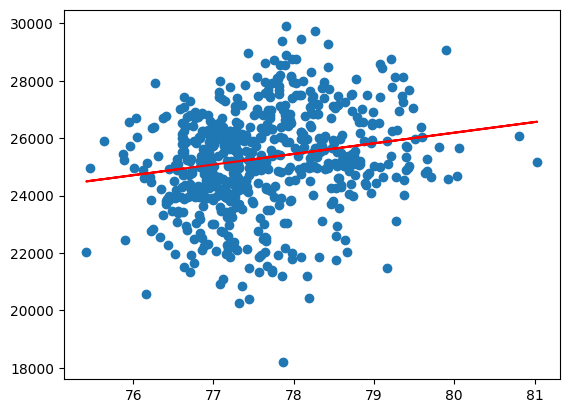

Level  vs  H2R  Accuracy:  0.4640115041762538 %


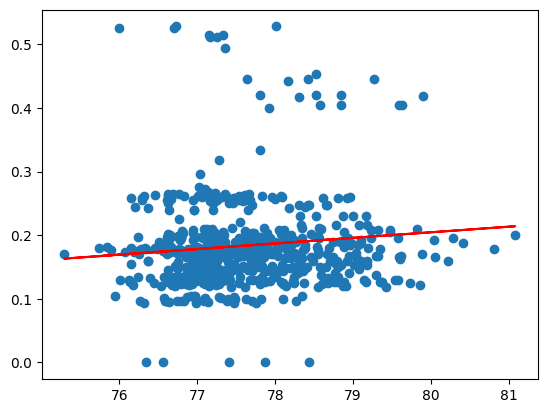

Level  vs  Pressure  Accuracy:  0.13451870896168394 %


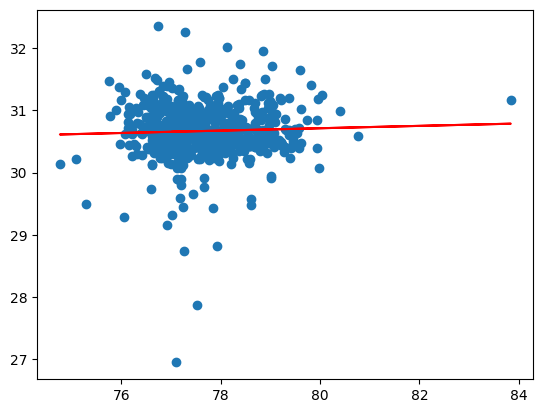

Level  vs  C2  Accuracy:  9.547992111961323 %


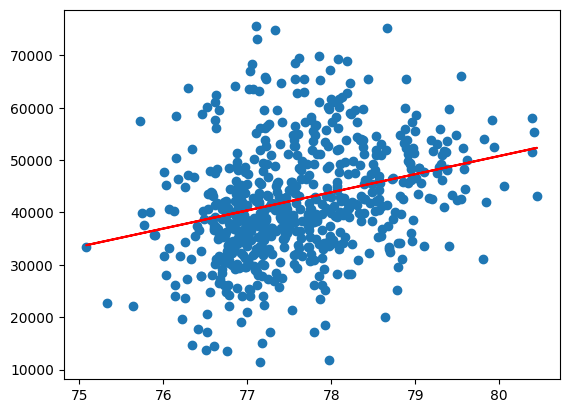

Level  vs  Cat  Accuracy:  -0.1778747702579464 %


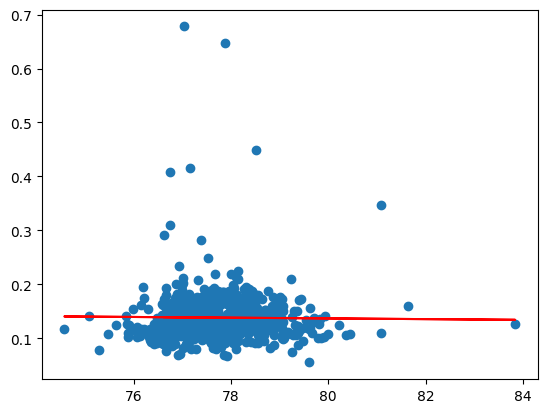

Level  vs  Temp  Accuracy:  -0.33098277381837793 %


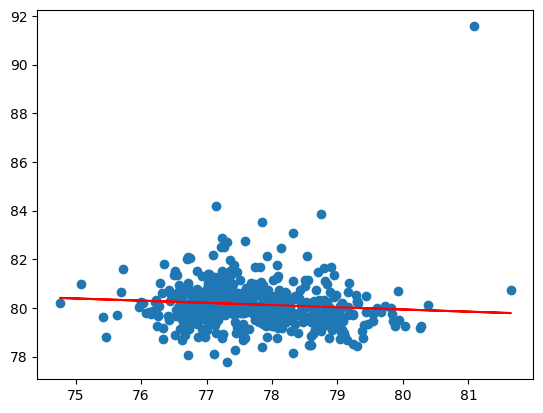

Level  vs  MFR  Accuracy:  -0.03356647171852689 %


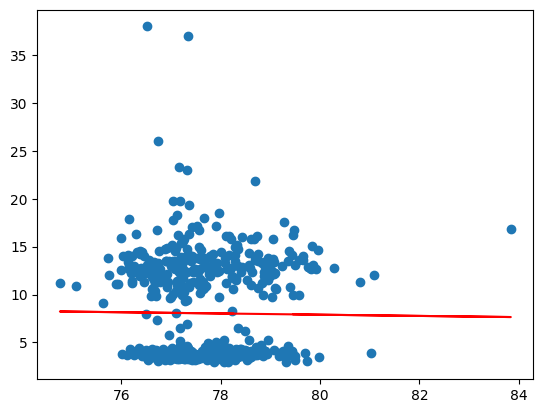

C2  vs  C3  Accuracy:  13.687006347792929 %


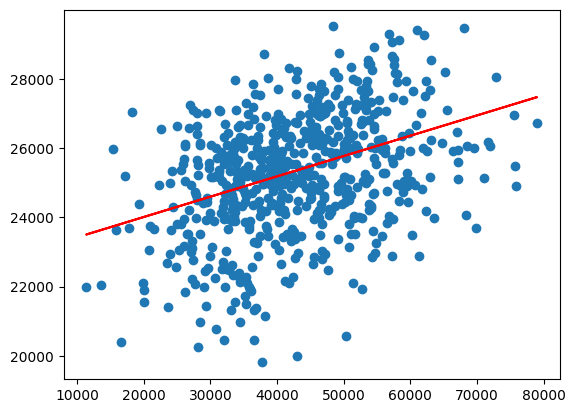

C2  vs  H2R  Accuracy:  15.37128137096765 %


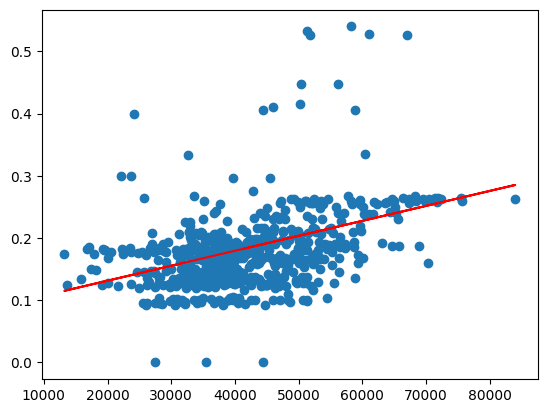

C2  vs  Pressure  Accuracy:  -0.16182707836442933 %


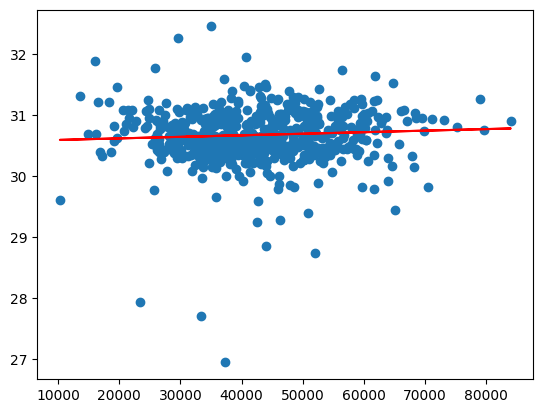

C2  vs  Level  Accuracy:  10.089185796154643 %


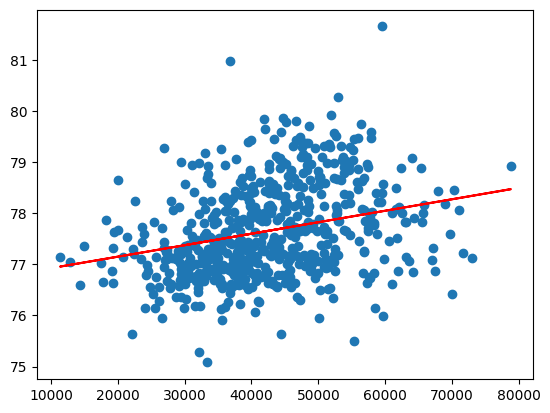

C2  vs  Cat  Accuracy:  2.2757621580482112 %


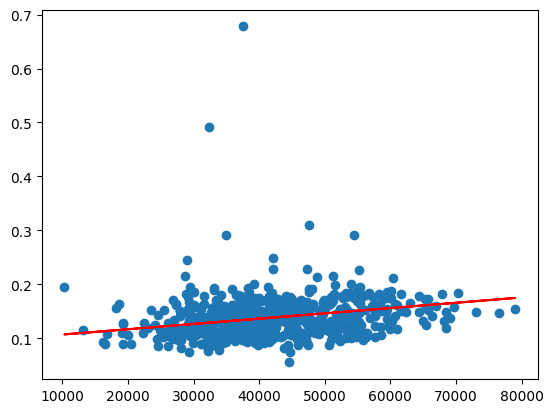

C2  vs  Temp  Accuracy:  0.8357530955957482 %


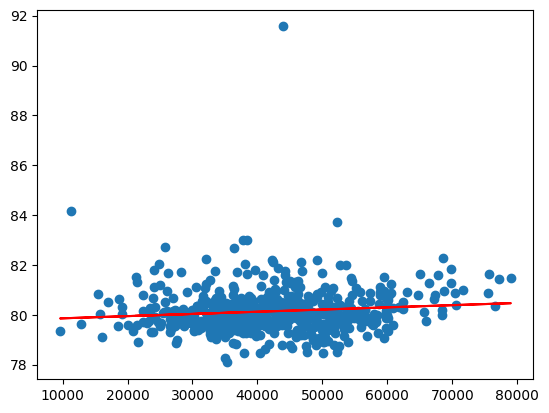

C2  vs  MFR  Accuracy:  4.05200938105631 %


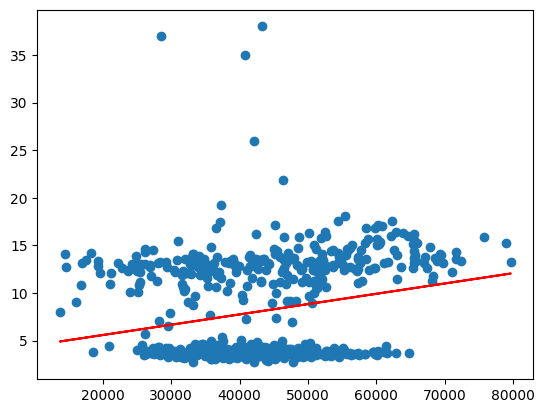

Cat  vs  C3  Accuracy:  8.52537330076123 %


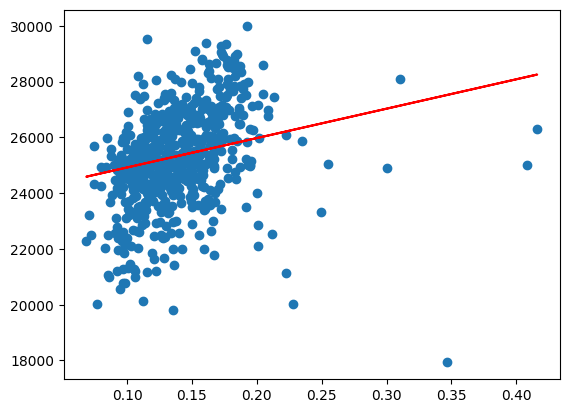

Cat  vs  H2R  Accuracy:  7.58722994812242 %


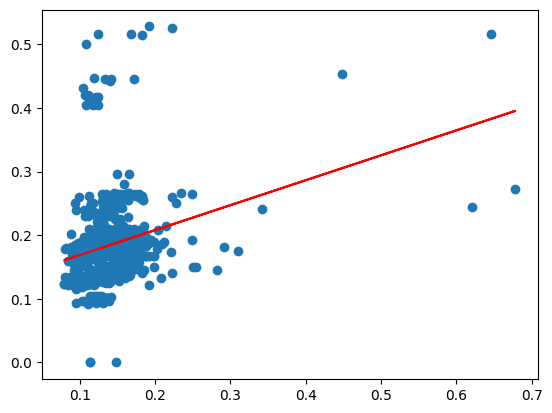

Cat  vs  Pressure  Accuracy:  0.7548402350585071 %


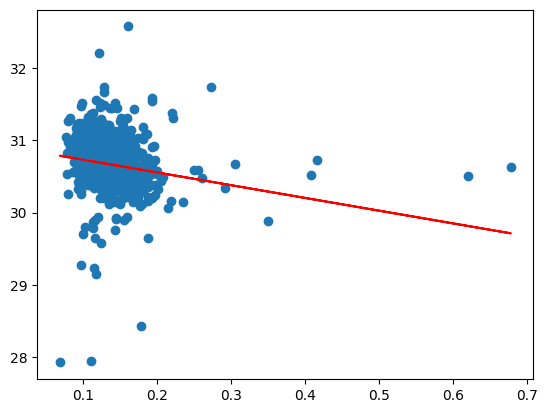

Cat  vs  Level  Accuracy:  -0.009921074071650438 %


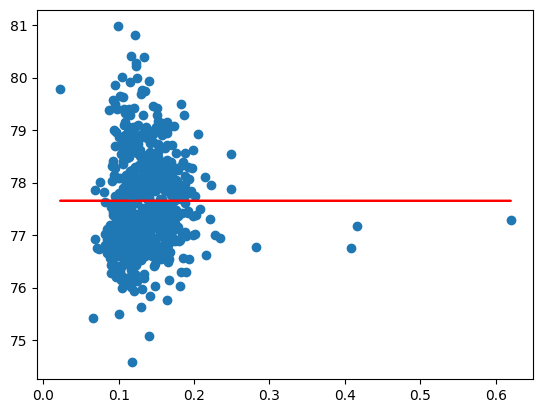

Cat  vs  C2  Accuracy:  7.693281281669185 %


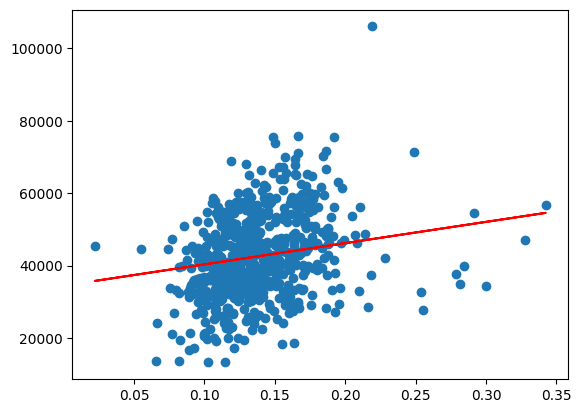

Cat  vs  Temp  Accuracy:  0.7430625577234395 %


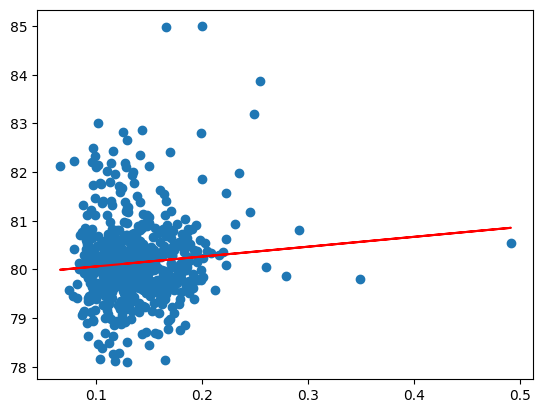

Cat  vs  MFR  Accuracy:  -0.4592750310213889 %


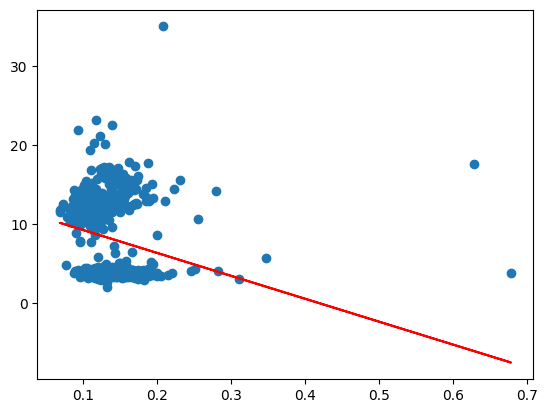

Temp  vs  C3  Accuracy:  2.846398013181217 %


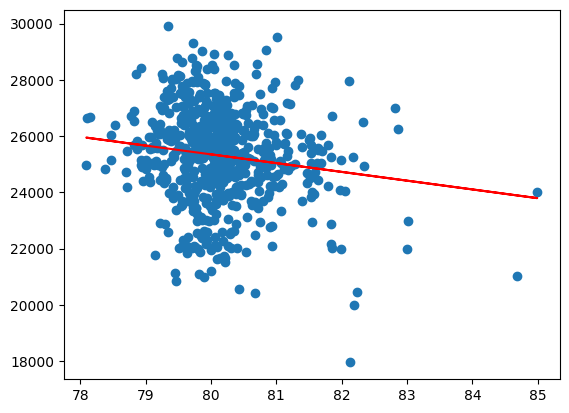

Temp  vs  H2R  Accuracy:  -0.5854057175682881 %


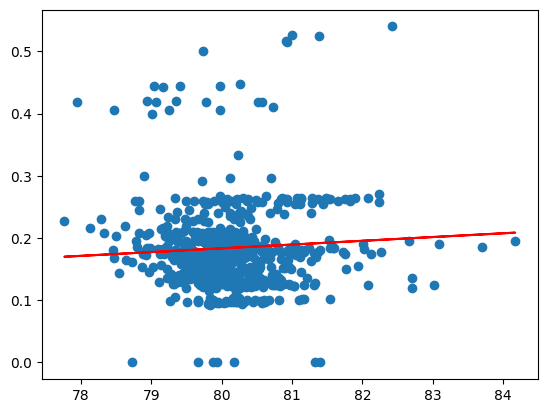

Temp  vs  Pressure  Accuracy:  0.23022253866300524 %


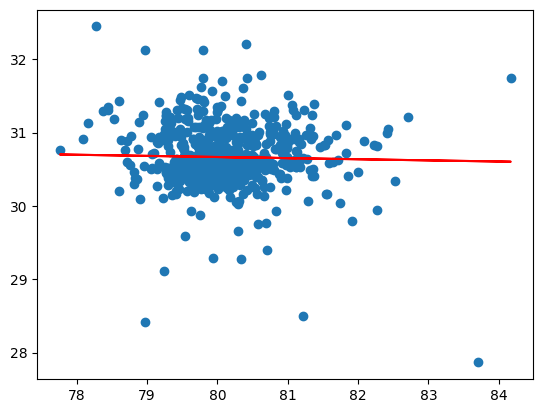

Temp  vs  Level  Accuracy:  1.292347905272695 %


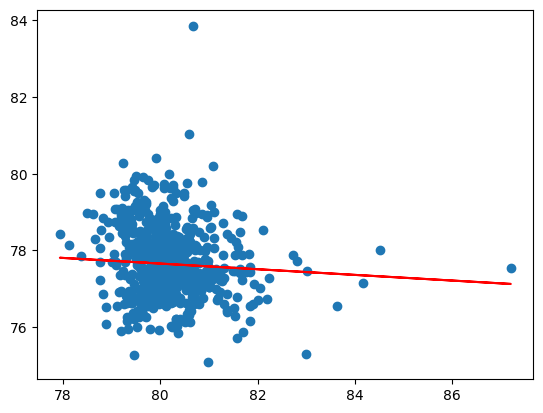

Temp  vs  C2  Accuracy:  1.376857716265456 %


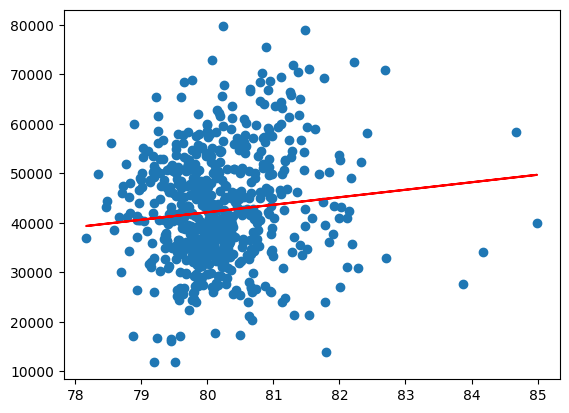

Temp  vs  Cat  Accuracy:  -0.433082175127808 %


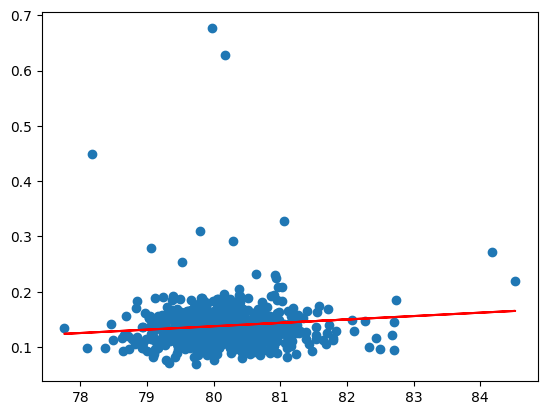

Temp  vs  MFR  Accuracy:  0.843570197905974 %


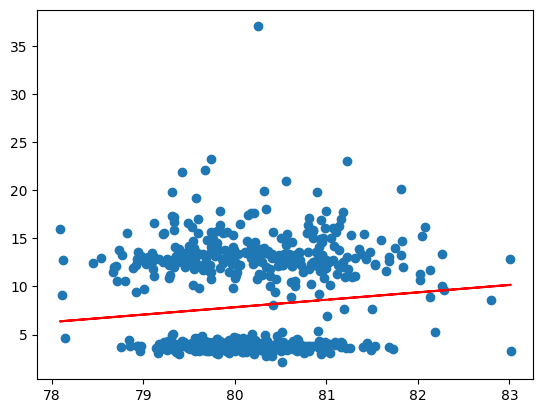

MFR  vs  C3  Accuracy:  8.949717290540837 %


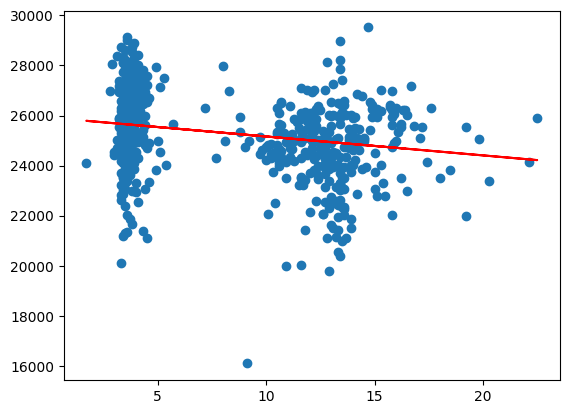

MFR  vs  H2R  Accuracy:  21.262095722213893 %


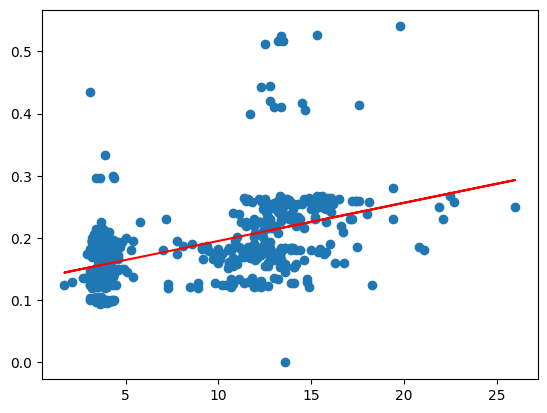

MFR  vs  Pressure  Accuracy:  20.83077059184103 %


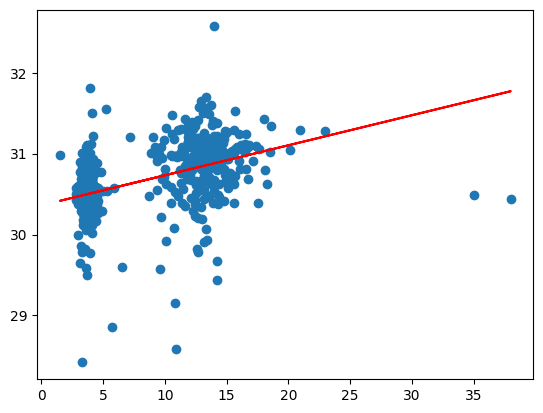

MFR  vs  Level  Accuracy:  -0.31171550871640363 %


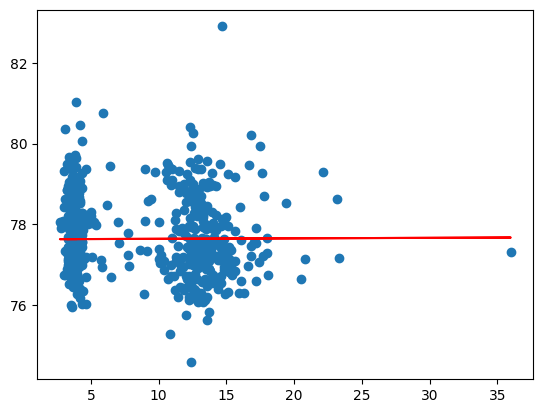

MFR  vs  C2  Accuracy:  5.335442960819126 %


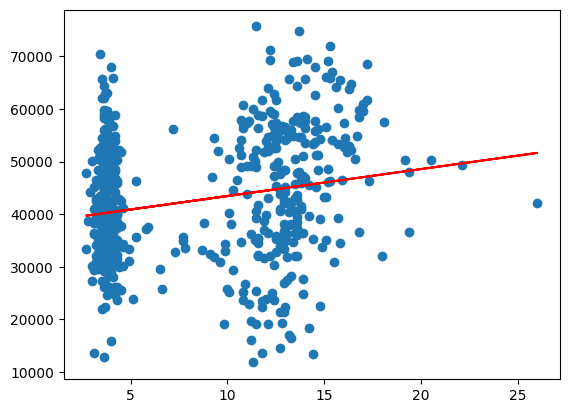

MFR  vs  Cat  Accuracy:  10.182673736237568 %


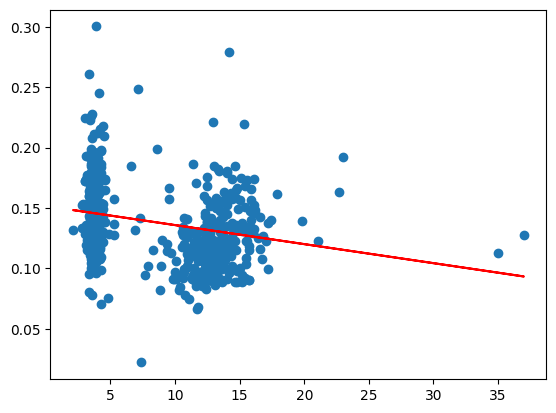

MFR  vs  Temp  Accuracy:  2.1556074558435556 %


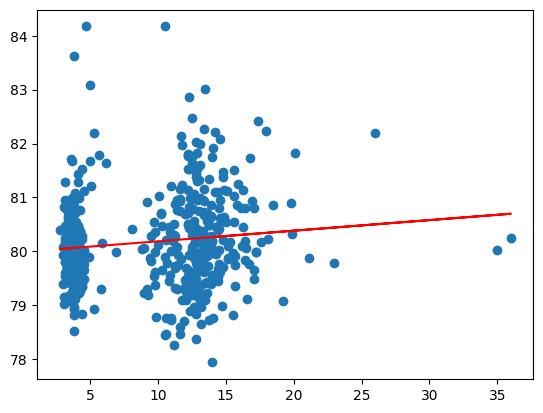

Time Stamp  vs  C3  Accuracy:  9.713761140245037 %


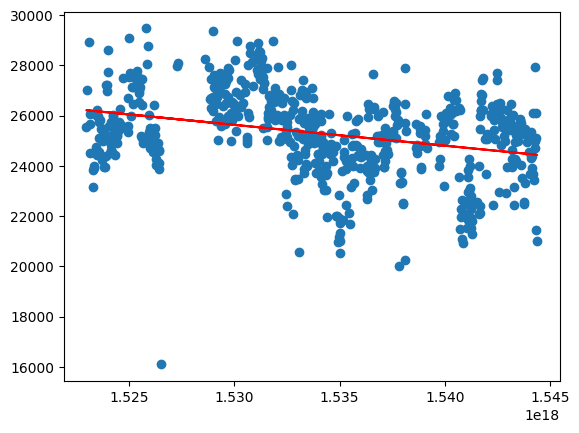

Time Stamp  vs  H2R  Accuracy:  8.919437887940928 %


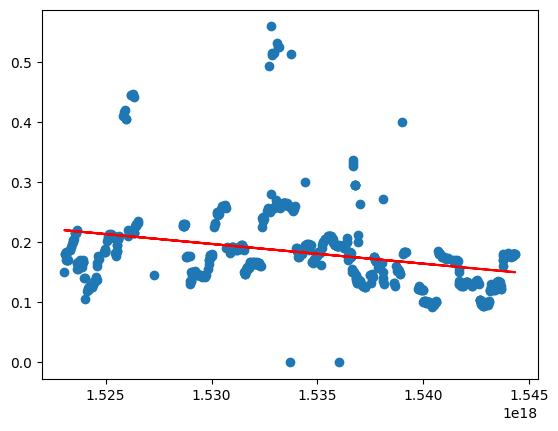

Time Stamp  vs  Pressure  Accuracy:  -0.2121965278899296 %


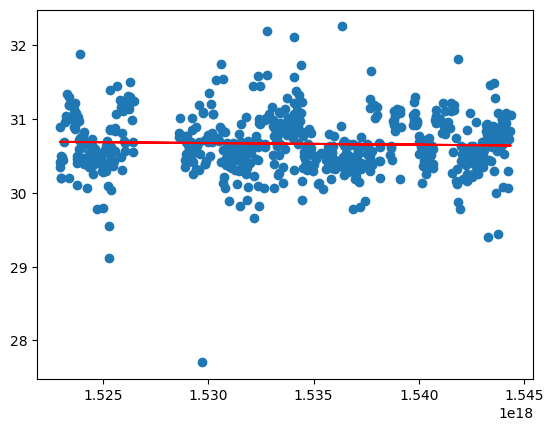

Time Stamp  vs  Level  Accuracy:  44.913460880989135 %


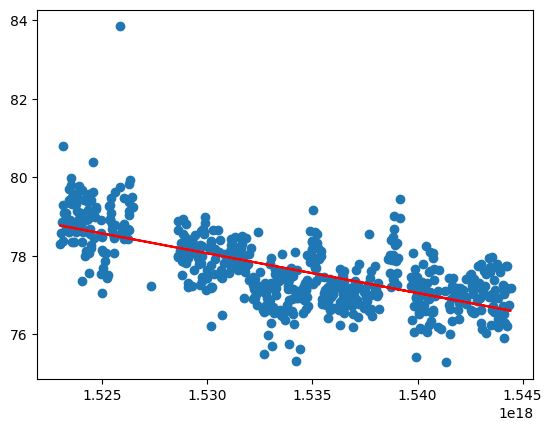

Time Stamp  vs  C2  Accuracy:  13.587315070541162 %


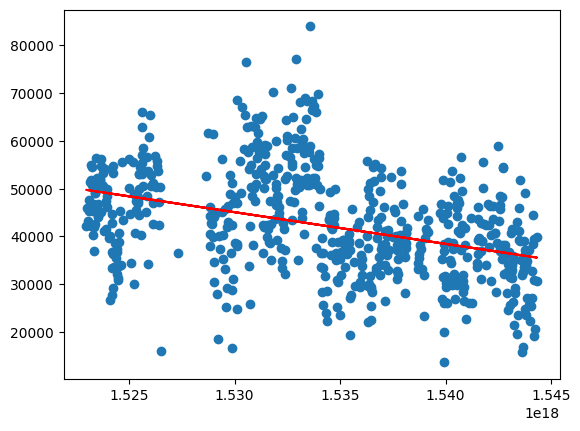

Time Stamp  vs  Cat  Accuracy:  2.3066654096695283 %


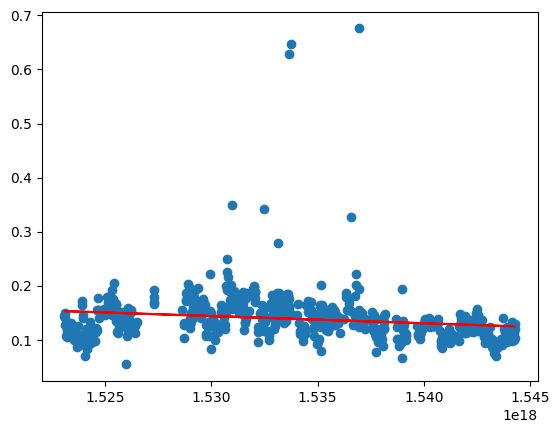

Time Stamp  vs  Temp  Accuracy:  9.632202532596468 %


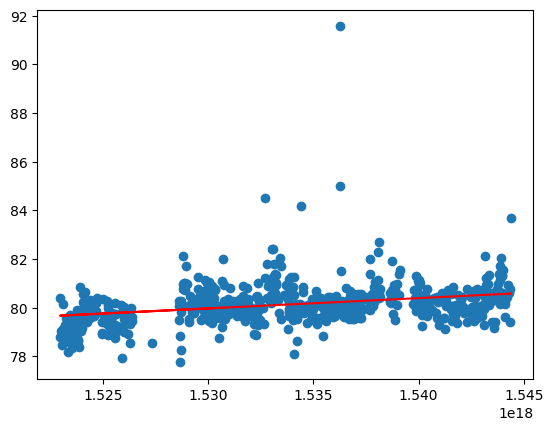

Time Stamp  vs  MFR  Accuracy:  -0.5883150001372073 %


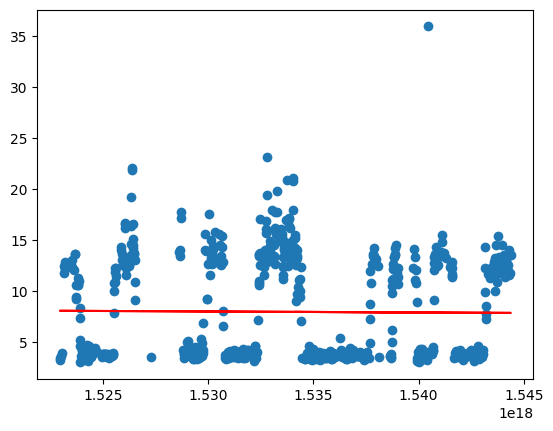

In [175]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
sing_lin_df = pd.DataFrame(columns= ['Column A', 'Column B', 'Accuracy'])
for columnA in df:
    for columnB in df:
        if columnB == 'Time Stamp' or columnA == columnB: continue
        X = imp.fit_transform(df[[columnA]])
        y = imp.fit_transform(df[[columnB]])
        df.dropna(inplace= True)
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .25)

        reg = LinearRegression()

        reg.fit(Xtrain,ytrain)
        ypred = reg.predict(Xtest)
        r2 = r2_score(ytest,ypred) * 100
        print(columnA, " vs ", columnB, " Accuracy: ", r2, "%")
        plt.pyplot.scatter(Xtest,ytest)
        plt.pyplot.plot(Xtest,ypred, color = 'r')
        plt.pyplot.show()

        sing_lin_df.loc[-1] = {'Column A': columnA, 'Column B': columnB, 'Accuracy': r2}
        sing_lin_df.index += 1
        sing_lin_df = sing_lin_df.sort_index()

In [177]:
sing_lin_df = sing_lin_df.sort_values('Accuracy', ascending = False)
sing_lin_df.head(10)

,Column A,Column B,Accuracy
4,Time Stamp,Level,44.913461
13,MFR,H2R,21.262096
12,MFR,Pressure,20.830771
43,Pressure,MFR,18.277889
60,C3,C2,15.377493
34,C2,H2R,15.371281
53,H2R,C2,15.096343
35,C2,C3,13.687006
3,Time Stamp,C2,13.587315
50,H2R,MFR,12.635252
